# Analysis of Transportation Platforms in Mexico (Uber and DiDi)

**Autor:** Yair Carrillo Maldonado  
**Fecha:** July 20, 2025  
**Descripción:**  
This analysis explores the growth, user preferences, and behavior on mobility platforms such as Uber and DiDi in Mexico, using real data from Sensor Tower and Statista.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('mobility.csv')

## Dataset Description

The dataset contains information about transportation platforms in Mexico with variables such as:
- Platform
- Year
- Active Users in Mexico
- Market Share (%)
- Average Trips per User (wekly)


In [10]:
display(df.head())
display(df.describe().round(0).astype(int))

,Year,Quarter,Plataform,Active_Users_MX,Downloads_Per_Week,Market_Share,Avg_Trips_Per_User_Per_Week
0,2018,Q1,Uber,3000000,150000,95,2.20
1,2018,Q1,Didi,150000,180000,5,2.41
2,2018,Q2,Uber,2850000,142500,95,2.20
3,2018,Q2,Didi,142500,171000,5,2.47
4,2018,Q3,Uber,3150000,157500,95,2.24


,Year,Active_Users_MX,Downloads_Per_Week,Market_Share,Avg_Trips_Per_User_Per_Week
count,56,56,56,56,56
mean,2021,3664375,169125,50,2
std,2,2003825,18112,27,0
min,2018,142500,142500,5,2
25%,2019,2178750,155625,35,2
50%,2021,4147500,168000,50,2
75%,2023,5313750,182250,65,2
max,2024,6490000,198000,95,3


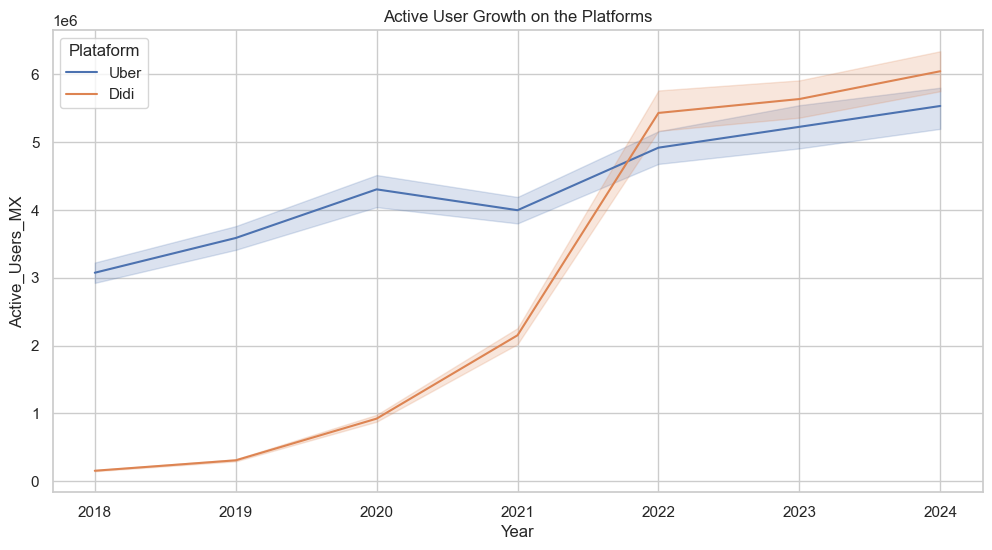

In [17]:
plt.figure(figsize =(12,6))
ax=sns.lineplot(data=df, x='Year', y='Active_Users_MX', hue='Plataform')
plt.title ('Active User Growth on the Platforms')
plt.show()

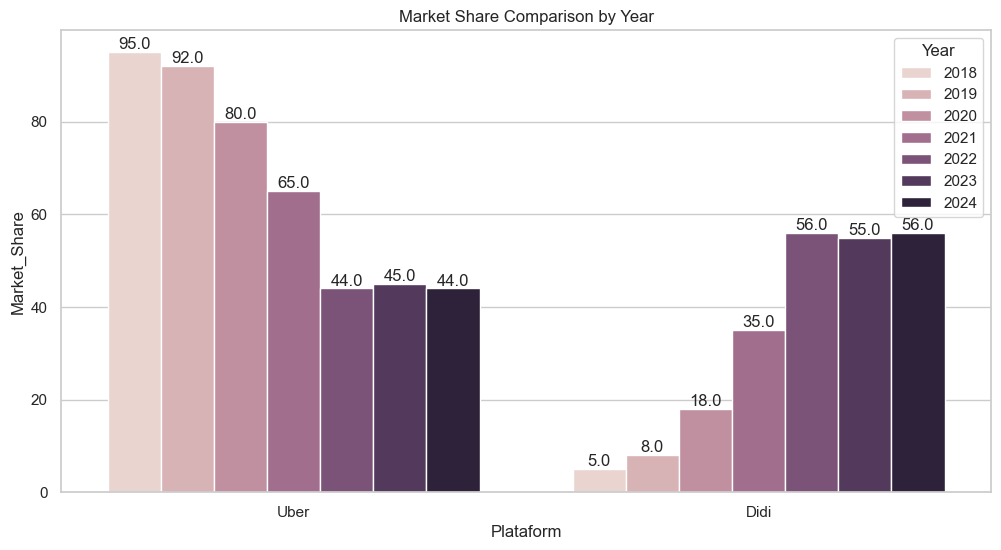

In [19]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data= df, x='Plataform', y='Market_Share', hue= 'Year')
plt.title('Market Share Comparison by Year')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f', label_type='edge')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

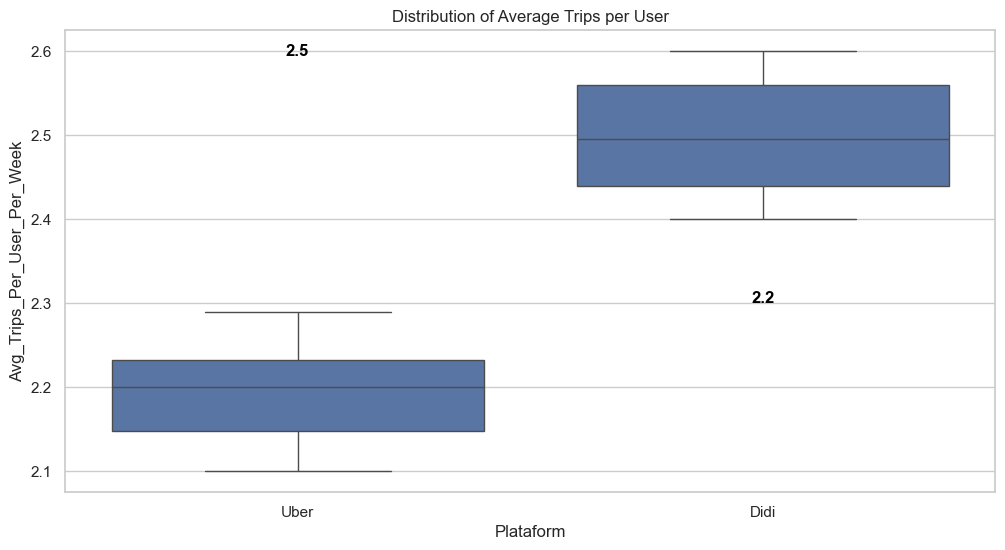

In [22]:
ax=sns.boxplot(data=df, x='Plataform', y='Avg_Trips_Per_User_Per_Week')
plt.title('Distribution of Average Trips per User')
medians = df.groupby('Plataform')['Avg_Trips_Per_User_Per_Week'].median().values
for tick, median in zip(ax.get_xticks(), medians):
    ax.text(tick, median + 0.1, f'{median:.1f}', 
            horizontalalignment='center', color='black', weight='bold')
plt.show

In [26]:
Tabla_resumen = df.groupby('Plataform')['Avg_Trips_Per_User_Per_Week'].describe()[['min','25%','50%','75%','max']]
Tabla_resumen = Tabla_resumen.rename(columns={
    '25%' : 'Q1 (25%)',
    '50%' : 'Median',
    '75%' : 'Q3 (75%)',
    'min' : 'Minimum',
    'max' : 'Maximum',
})

print(Tabla_resumen)

           Minimum  Q1 (25%)  Median  Q3 (75%)  Maximum
Plataform                                              
Didi           2.4    2.4400   2.495    2.5600     2.60
Uber           2.1    2.1475   2.200    2.2325     2.29


In [30]:
referencias = """
### Data Sources Used

- **Sensor Tower** (2024). *Top 5 Carpooling and Ridesharing Apps Performance in Mexico Q3 2024*.  
  [https://sensortower.com/blog/2024-q3-unified-top-5-carpooling%20and%20ridesharing%20apps-units-mx-63e3708de1714cfff1489d09](https://sensortower.com/blog/2024-q3-unified-top-5-carpooling%20and%20ridesharing%20apps-units-mx-63e3708de1714cfff1489d09)

- **Sensor Tower** (2024). *Navigating LatAm’s Ride‑Hailing Landscape: Growth, Competition, and User Engagement Strategies*.  
  [https://sensortower.com/blog/navigating-lat-ams-ride-hailing-landscape-growth-competition-and-user-engagement-strategies](https://sensortower.com/blog/navigating-lat-ams-ride-hailing-landscape-growth-competition-and-user-engagement-strategies)

- **Statista** (2025). *Shared Mobility Statistics and Facts*.  
  [https://www.news.market.us/shared-mobility-statistics](https://www.news.market.us/shared-mobility-statistics)
"""
display(Markdown(referencias))


### Data Sources Used

- **Sensor Tower** (2024). *Top 5 Carpooling and Ridesharing Apps Performance in Mexico Q3 2024*.  
  [https://sensortower.com/blog/2024-q3-unified-top-5-carpooling%20and%20ridesharing%20apps-units-mx-63e3708de1714cfff1489d09](https://sensortower.com/blog/2024-q3-unified-top-5-carpooling%20and%20ridesharing%20apps-units-mx-63e3708de1714cfff1489d09)

- **Sensor Tower** (2024). *Navigating LatAm’s Ride‑Hailing Landscape: Growth, Competition, and User Engagement Strategies*.  
  [https://sensortower.com/blog/navigating-lat-ams-ride-hailing-landscape-growth-competition-and-user-engagement-strategies](https://sensortower.com/blog/navigating-lat-ams-ride-hailing-landscape-growth-competition-and-user-engagement-strategies)

- **Statista** (2025). *Shared Mobility Statistics and Facts*.  
  [https://www.news.market.us/shared-mobility-statistics](https://www.news.market.us/shared-mobility-statistics)
